# ULTRA SLOW INSULIN (TRESIBA AND TOUJEO FOR EXAMPLE)

## ULTRALONG

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f, g,h):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f + (g * x**6) + (h * x**7)

def bilinear(xdata, xpeak=6, ypeak=1, totalDuration=24):
        a1 = ypeak/xpeak
        a2 = -ypeak/(totalDuration-xpeak)
        b2 = ypeak - (xpeak*a2)       
        return np.piecewise(xdata, [xdata <= xpeak, xdata > xpeak], [lambda x: x*a1, lambda x: a2*x + b2])

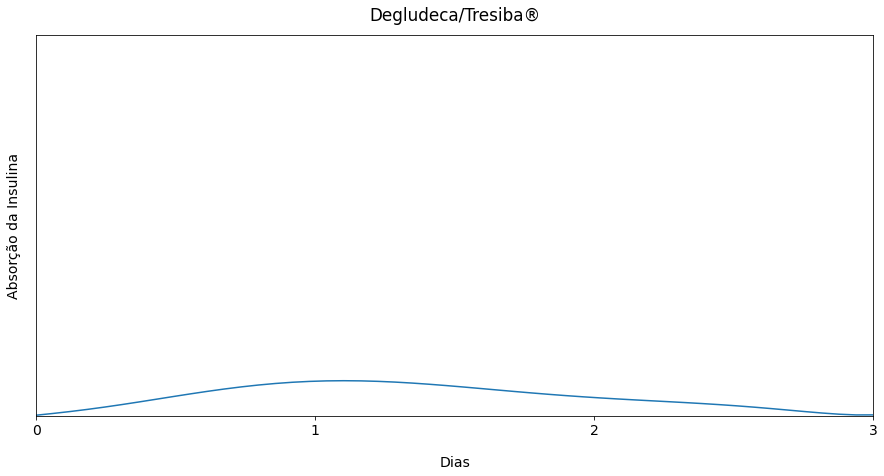

In [164]:

# bilinear
xpeak = 24
ypeak = 1
totalDuration = 72

x = np.linspace(0,totalDuration, num=50)
y_bilinear = bilinear(x, xpeak=xpeak, ypeak=ypeak, totalDuration=totalDuration)

# smoothing
pars, cov = curve_fit(f=objective, xdata=x, ydata=y_bilinear)
y_poly = objective(x, *pars)


#generate insulin curve for many days
days = 1
insulinPerDay = []
for i in range(0,days):
    offset = i*24
    insulinPerDay.append([x + offset, y_poly])

#generate combined action of these days
noSuperpositionPct = (24/totalDuration)
totalInsulinX = []
totalInsulinY = []
for i, day in enumerate(insulinPerDay):
    xday = day[0]
    yday = day[1]
    offset = int(i*noSuperpositionPct*len(xday))
    for j in range(0, len(xday)):
        totalInsulinIndex = j + offset
        if totalInsulinIndex < len(totalInsulinY):
            totalInsulinY[totalInsulinIndex] += yday[j] 
        else: # continue expanding array by inserting new data
            totalInsulinX.append(xday[j])
            totalInsulinY.append(yday[j])


#take tresiba data
tresibaX = totalInsulinX
tresibaY = totalInsulinY

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Degludeca/Tresiba®',pad=15)
ax.set_xlabel('Dias', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, int(max(totalInsulinX)/24) +1)) #converte de horas para dias
plt.xlim(0, 3)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])

plt.plot([number / 24 for number in totalInsulinX], totalInsulinY)
#plt.plot([number / 24 for number in totalInsulinX], 0.8*np.ones(len(totalInsulinX)), '--', alpha=0.5,linewidth=2)
plt.show()


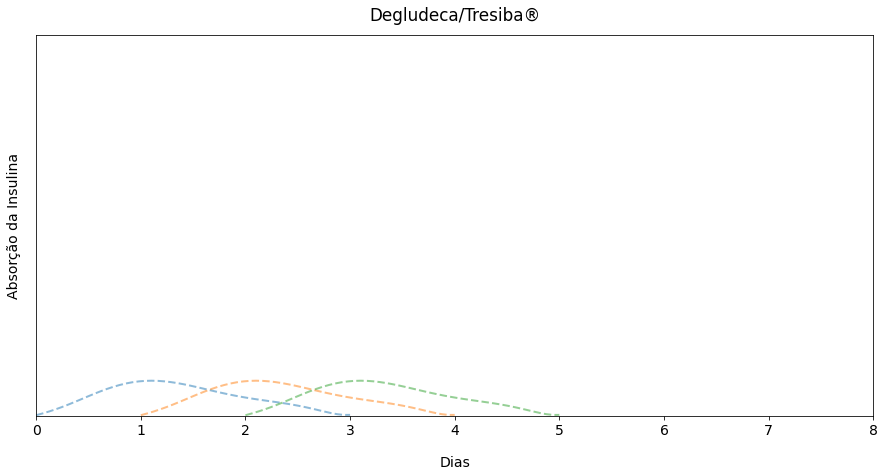

In [119]:

# bilinear
xpeak = 24
ypeak = 1
totalDuration = 72

x = np.linspace(0,totalDuration, num=50)
y_bilinear = bilinear(x, xpeak=xpeak, ypeak=ypeak, totalDuration=totalDuration)

# smoothing
pars, cov = curve_fit(f=objective, xdata=x, ydata=y_bilinear)
y_poly = objective(x, *pars)


#generate insulin curve for many days
days = 7
insulinPerDay = []
for i in range(0,days):
    offset = i*24
    insulinPerDay.append([x + offset, y_poly])


#generate combined action of these days
noSuperpositionPct = (24/totalDuration)
totalInsulinX = []
totalInsulinY = []
for i, day in enumerate(insulinPerDay):
    xday = day[0]
    yday = day[1]
    offset = int(i*noSuperpositionPct*len(xday))
    for j in range(0, len(xday)):
        totalInsulinIndex = j + offset
        if totalInsulinIndex < len(totalInsulinY):
            totalInsulinY[totalInsulinIndex] += yday[j] 
        else: # continue expanding array by inserting new data
            totalInsulinX.append(xday[j])
            totalInsulinY.append(yday[j])

# smoothing
pars, cov = curve_fit(f=objective, xdata=np.array(totalInsulinX), ydata=np.array(totalInsulinY))
totalInsulinYSmooth = objective(np.array(totalInsulinX), *pars)

   
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Degludeca/Tresiba®',pad=15)
ax.set_xlabel('Dias', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, int(max(totalInsulinX)/24) +1)) #converte de horas para dias
plt.xlim(0, days+1)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])


#plt.plot([number / 24 for number in totalInsulinX], totalInsulinY)
#plt.plot([number / 24 for number in totalInsulinX], totalInsulinYSmooth)

for idx,day in enumerate(insulinPerDay):
    #if ((idx) % 3 == 0) or idx == 0:
    #    plt.plot([number / 24 for number in day[0]], day[1], linewidth=2, alpha=0.8)
    if idx < 3:
        plt.plot([number / 24 for number in day[0]], day[1], '--', linewidth=2, alpha=0.5)

#plt.plot(x, y_bilinear)
#plt.plot([number / 24 for number in totalInsulinX], 0.8*np.ones(len(totalInsulinX)), '--', alpha=0.5,linewidth=2)
plt.xticks()
plt.show()


## NPH

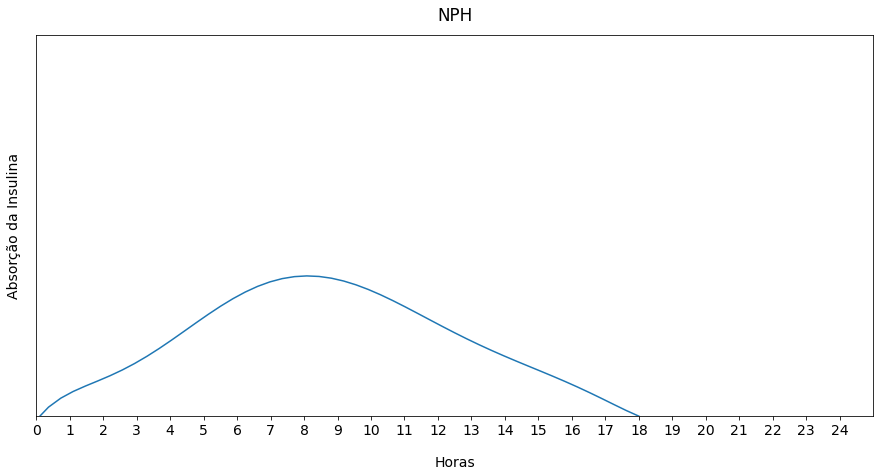

In [182]:
# bilinear
xpeak = 8
ypeak = 4
totalDuration = 18

x = np.linspace(0,totalDuration, num=50)
y_bilinear = bilinear(x, xpeak=xpeak, ypeak=ypeak, totalDuration=totalDuration)

# smoothing
pars, cov = curve_fit(f=objective, xdata=x, ydata=y_bilinear)
y_poly = objective(x, *pars)


#generate insulin curve for many days
days = 1
insulinPerDay = []
for i in range(0,days):
    offset = i*24
    insulinPerDay.append([x + offset, y_poly])

#generate combined action of these days
noSuperpositionPct = (24/totalDuration)
totalInsulinX = []
totalInsulinY = []
for i, day in enumerate(insulinPerDay):
    xday = day[0]
    yday = day[1]
    offset = int(i*noSuperpositionPct*len(xday))
    for j in range(0, len(xday)):
        totalInsulinIndex = j + offset
        if totalInsulinIndex < len(totalInsulinY):
            totalInsulinY[totalInsulinIndex] += yday[j] 
        else: # continue expanding array by inserting new data
            totalInsulinX.append(xday[j])
            totalInsulinY.append(yday[j])

#take nph data
nphX = totalInsulinX
nphY = totalInsulinY

  
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('NPH',pad=15)
ax.set_xlabel('Horas', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, 25))
plt.xlim(0, 25)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])

plt.plot(totalInsulinX, totalInsulinY)
#plt.plot([number / 24 for number in totalInsulinX], totalInsulinY)
#plt.plot(totalInsulinX, 1.2*np.ones(len(totalInsulinX)), '--', alpha=0.5,linewidth=2)
plt.show()

## LONG 

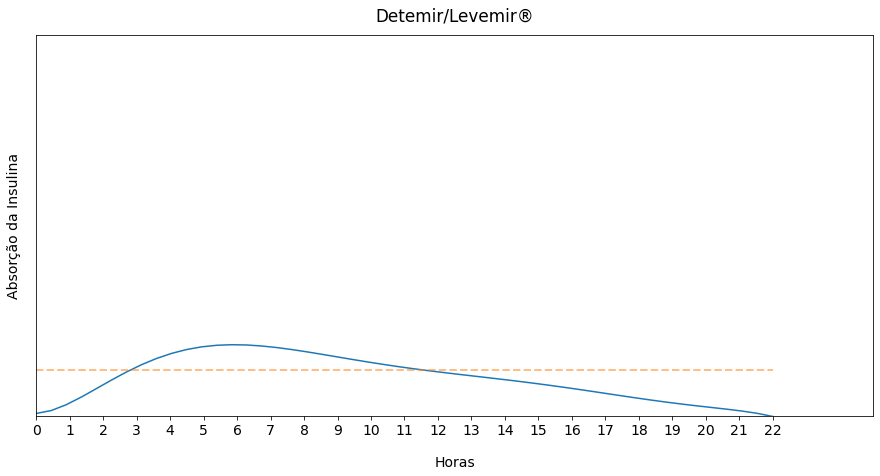

In [174]:

# bilinear
xpeak = 5
ypeak = 2
totalDuration = 22

x = np.linspace(0,totalDuration, num=50)
y_bilinear = bilinear(x, xpeak=xpeak, ypeak=ypeak, totalDuration=totalDuration)

# smoothing
pars, cov = curve_fit(f=objective, xdata=x, ydata=y_bilinear)
y_poly = objective(x, *pars)


#generate insulin curve for many days
days = 1
insulinPerDay = []
for i in range(0,days):
    offset = i*24
    insulinPerDay.append([x + offset, y_poly])

#generate combined action of these days
noSuperpositionPct = (24/totalDuration)
totalInsulinX = []
totalInsulinY = []
for i, day in enumerate(insulinPerDay):
    xday = day[0]
    yday = day[1]
    offset = int(i*noSuperpositionPct*len(xday))
    for j in range(0, len(xday)):
        totalInsulinIndex = j + offset
        if totalInsulinIndex < len(totalInsulinY):
            totalInsulinY[totalInsulinIndex] += yday[j] 
        else: # continue expanding array by inserting new data
            totalInsulinX.append(xday[j])
            totalInsulinY.append(yday[j])

#take levemir data
levemirX = totalInsulinX
levemirY = totalInsulinY
  
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Detemir/Levemir®',pad=15)
ax.set_xlabel('Horas', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, int(max(totalInsulinX)) +1))
plt.xlim(0, 25)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])

plt.plot(totalInsulinX, totalInsulinY)
#plt.plot(nphX, nphY)
#plt.plot([number / 24 for number in totalInsulinX], totalInsulinY)
plt.plot(totalInsulinX, 1.2*np.ones(len(totalInsulinX)), '--', alpha=0.5,linewidth=2)
"""
ax.annotate("DETEMIR",
  xy     = (     levemirX[int(len(levemirX)/2)-5], levemirY[int(len(levemirY)/2)]),
  xytext = (levemirX[int(len(levemirX)/2)-5], 1.5*levemirY[int(len(levemirY)/2)]), color='blue'
)

ax.annotate("NPH",
  xy     = (     nphX[int(len(nphX)/2)], nphY[int(len(nphY)/2)]),
  xytext = (nphX[int(len(nphX)/2)], 1.2*nphY[int(len(nphY)/2)]), color='orange'
)
"""

plt.show()

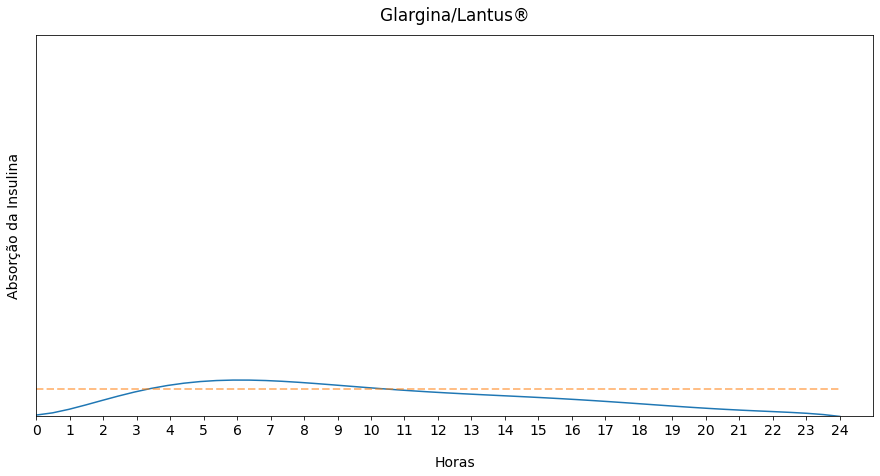

In [165]:

# bilinear
xpeak = 5
ypeak = 1
totalDuration = 24

x = np.linspace(0,totalDuration, num=50)
y_bilinear = bilinear(x, xpeak=xpeak, ypeak=ypeak, totalDuration=totalDuration)

# smoothing
pars, cov = curve_fit(f=objective, xdata=x, ydata=y_bilinear)
y_poly = objective(x, *pars)


#generate insulin curve for many days
days = 1
insulinPerDay = []
for i in range(0,days):
    offset = i*24
    insulinPerDay.append([x + offset, y_poly])

#generate combined action of these days
noSuperpositionPct = (24/totalDuration)
totalInsulinX = []
totalInsulinY = []
for i, day in enumerate(insulinPerDay):
    xday = day[0]
    yday = day[1]
    offset = int(i*noSuperpositionPct*len(xday))
    for j in range(0, len(xday)):
        totalInsulinIndex = j + offset
        if totalInsulinIndex < len(totalInsulinY):
            totalInsulinY[totalInsulinIndex] += yday[j] 
        else: # continue expanding array by inserting new data
            totalInsulinX.append(xday[j])
            totalInsulinY.append(yday[j])

#take lantus data
lantusX = totalInsulinX
lantusY = totalInsulinY

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Glargina/Lantus®',pad=15)
ax.set_xlabel('Horas', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, int(max(totalInsulinX)) +1))
plt.xlim(0, 25)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])

plt.plot(totalInsulinX, totalInsulinY)
#plt.plot(levemirX, levemirY)
#plt.plot([number / 24 for number in totalInsulinX], totalInsulinY)
plt.plot(totalInsulinX, 0.7*np.ones(len(totalInsulinX)), '--', alpha=0.5,linewidth=2)
plt.show()

## COMPARATIVO

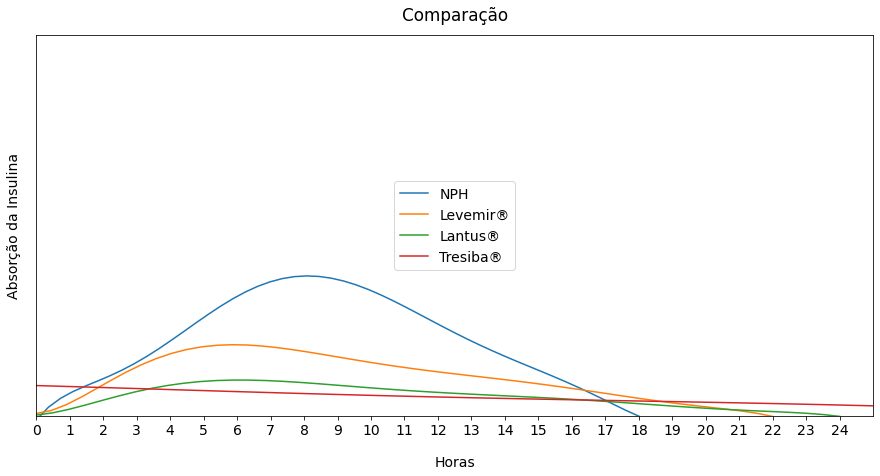

In [180]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Comparação',pad=15)
ax.set_xlabel('Horas', labelpad=18)
ax.set_ylabel('Absorção da Insulina', labelpad=15)
plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, 25))
plt.xlim(0, 25)
plt.ylim(0, 10)
ax.get_yaxis().set_ticks([])

plt.plot(nphX, nphY)
plt.plot(levemirX, levemirY)
plt.plot(lantusX, lantusY)
plt.plot(tresibaX[0:24], tresibaY[24:48])

ax.legend(["NPH", "Levemir®", "Lantus®" ,"Tresiba®"], loc="center")

plt.show()